<a href="https://colab.research.google.com/github/IshaPendharkar/crypto-analysis/blob/main/cryptocurrencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.5 MB/s 
     |████████████████████████████████| 235 kB 60.3 MB/s 
     |████████████████████████████████| 6.4 MB 45.5 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=23b59ee6e1565f291303aa8bd92d053b45e1e3227fd8206b838c47e2db8eaa23
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import investpy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
Bitcoin = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Ethereum = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Litecoin = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Monero = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Ripple = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Solana = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Stellar = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Tether = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")
Tron = pd.read_csv("/content/drive/MyDrive/DA visualization test/coin_Monero.csv")

In [4]:
visualize_Monero = cycle(['Open','Close','High','Low'])

fig = px.line(Monero, x=Monero.Date, y=[Monero['Open'], Monero['Close'], 
                                          Monero['High'], Monero['Low']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Monero', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_Monero)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [5]:
visualize_Bitcoin = cycle(['High'])

fig = px.line(Bitcoin, x=Bitcoin.Date, y=[Bitcoin['High']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Bitcoin', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_Bitcoin)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Bitcoin’s "Low" for the first month

In [6]:
data1 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2018', to_date='31/01/2018')
px.line(data1, y='Low', labels={'x':'Date', 'y':'Low'})

Bitcoin’s "Low" for the last month

In [7]:
data2 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/03/2022', to_date='31/03/2022')
px.line(data2, y='Low', labels={'x':'Date', 'y':'Low'})

Ethereum’s "High" for the first month

In [8]:
data3 = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/01/2018', to_date='31/01/2018')
px.line(data3, y='High', labels={'x':'Date', 'y':'High'})

Ethereum’s "High" for the last month

In [9]:
data4 = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/03/2022', to_date='31/03/2022')
px.line(data4, y='High', labels={'x':'Date', 'y':'High'})

In [10]:
data5 = investpy.get_crypto_historical_data(crypto='tron', from_date='01/01/2020', to_date='31/01/2020')
data6 = investpy.get_crypto_historical_data(crypto='tether', from_date='01/01/2020', to_date='31/01/2020')
data7 = investpy.get_crypto_historical_data(crypto='stellar', from_date='01/01/2020', to_date='31/01/2020')
data8 = investpy.get_crypto_historical_data(crypto='monero', from_date='01/01/2020', to_date='31/01/2020')
data9 = investpy.get_crypto_historical_data(crypto='litecoin', from_date='01/01/2020', to_date='31/01/2020')
data10 = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/01/2020', to_date='31/01/2020')
data11 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2020', to_date='31/01/2020')

In [11]:
rolling_avg_tron = data5.rolling(window=5).mean()
rolling_avg_tether = data6.rolling(window=5).mean()
rolling_avg_stellar = data7.rolling(window=5).mean()
rolling_avg_monero = data8.rolling(window=5).mean()
rolling_avg_litecoin = data9.rolling(window=5).mean()
rolling_avg_ethereum = data10.rolling(window=5).mean()
rolling_avg_bitcoin = data11.rolling(window=5).mean()

High and Rolling Average graph for Tether

Text(0, 0.5, 'Price in $')

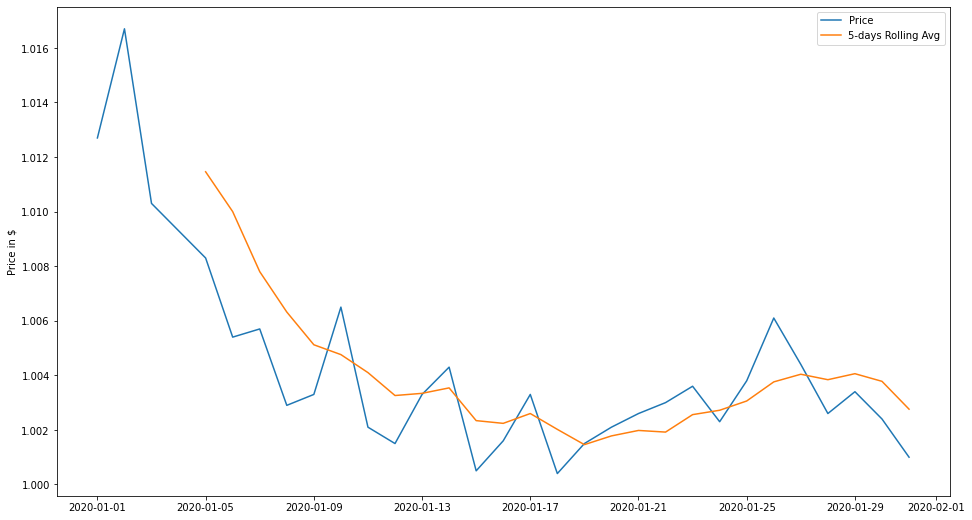

In [12]:
start_date = '01/01/2020'
end_date = '31/01/2020'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data6.loc[start_date:end_date, :].index, data6.loc[start_date:end_date, 'High'], label='Price')
ax.plot(rolling_avg_tether.loc[start_date:end_date, :].index, rolling_avg_tether.loc[start_date:end_date, 'High'], label = '5-days Rolling Avg')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
# ax.xaxis.set_major_formatter(my_year_month_fmt)

5 day Moving/Rolling Average of Volume Traded for every coin in given period

In [13]:
plot = go.Figure(data=[go.Line(
    name='Tron',
    y=rolling_avg_tron.Volume
),
    go.Line(
    name='Tether',
    y=rolling_avg_tether.Volume
),
    go.Line(
    name='Stellar',
    y=rolling_avg_stellar.Volume
),
    go.Line(
    name='Monero',
    y=rolling_avg_monero.Volume
),
    go.Line(
    name='Litecoin',
    y=rolling_avg_litecoin.Volume
),
    go.Line(
    name='Ethereum',
    y=rolling_avg_ethereum.Volume
),
    go.Line(
    name='Bitcoin',
    y=rolling_avg_bitcoin.Volume
),
])

plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Tron",
                            }]),
                dict(label="Tron",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Tron",
                            }]),
                dict(label="Tether",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Tether",
                            }]),
                dict(label="Stellar",
                     method="update",
                     args=[{"visible": [False,False, True, False, False, False, False]},
                           {"title": "Stellar",
                            }]),
                dict(label="Monero",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Monero",
                            }]),
                dict(label="Litecoin",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Litecoin",
                            }]),
                dict(label="Ethereum",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Ethereum",
                            }]),
                dict(label="Bitcoin",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Bitcoin",
                            }]),
                        
            ]),
        )
    ])
  
plot.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Candlestick graphs

In [14]:
fig = go.Figure(data=[go.Candlestick(x=Monero['Date'],
                open=Monero['Open'],
                high=Monero['High'],
                low=Monero['Low'],
                close=Monero['Close'])])

fig.show()

In [15]:
plot = go.Figure(data=[
    go.Candlestick(
    name='Tron',
    x=Tron['Date'],
    open=Tron['Open'],
    high=Tron['High'],
    low=Tron['Low'],
    close=Tron['Close']
),
    go.Candlestick(
    name='Tether',
    x=Tether['Date'],
    open=Tether['Open'],
    high=Tether['High'],
    low=Tether['Low'],
    close=Tether['Close']
),
    go.Candlestick(
    name='Stellar',
    x=Stellar['Date'],
    open=Stellar['Open'],
    high=Stellar['High'],
    low=Stellar['Low'],
    close=Stellar['Close']
),
    go.Candlestick(
    name='Monero',
    x=Monero['Date'],
    open=Monero['Open'],
    high=Monero['High'],
    low=Monero['Low'],
    close=Monero['Close']
),
    go.Candlestick(
    name='Litecoin',
    x=Litecoin['Date'],
    open=Litecoin['Open'],
    high=Litecoin['High'],
    low=Litecoin['Low'],
    close=Litecoin['Close']
),
    go.Candlestick(
    name='Ethereum',
    x=Ethereum['Date'],
    open=Ethereum['Open'],
    high=Ethereum['High'],
    low=Ethereum['Low'],
    close=Ethereum['Close']
),
    go.Candlestick(
    name='Bitcoin',
    x=Bitcoin['Date'],
    open=Bitcoin['Open'],
    high=Bitcoin['High'],
    low=Bitcoin['Low'],
    close=Bitcoin['Close']
),
])

plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Tron",
                            }]),
                dict(label="Tron",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Tron",
                            }]),
                dict(label="Tether",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Tether",
                            }]),
                dict(label="Stellar",
                     method="update",
                     args=[{"visible": [False,False, True, False, False, False, False]},
                           {"title": "Stellar",
                            }]),
                dict(label="Monero",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Monero",
                            }]),
                dict(label="Litecoin",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Litecoin",
                            }]),
                dict(label="Ethereum",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Ethereum",
                            }]),
                dict(label="Bitcoin",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Bitcoin",
                            }]),
                        
            ]),
        )
    ])
  
plot.show()

scatter plot for ‘Close’ Values of ETH and BTC for years: 2016,17,18 & 19.

In [16]:
data13 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2016', to_date='31/12/2019')
px.scatter(data13, y='Close', labels={'x':'Date', 'y':'Price'})

In [17]:
data12 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2016', to_date='31/12/2019')
px.scatter(data12, y='Close', labels={'x':'Date', 'y':'Price'})